Inertia Differences:
k=2 ➜ k=3  Δ = 178734144.08
k=3 ➜ k=4  Δ = 30443247.65
k=4 ➜ k=5  Δ = 17944115.90
k=5 ➜ k=6  Δ = 8942840.51


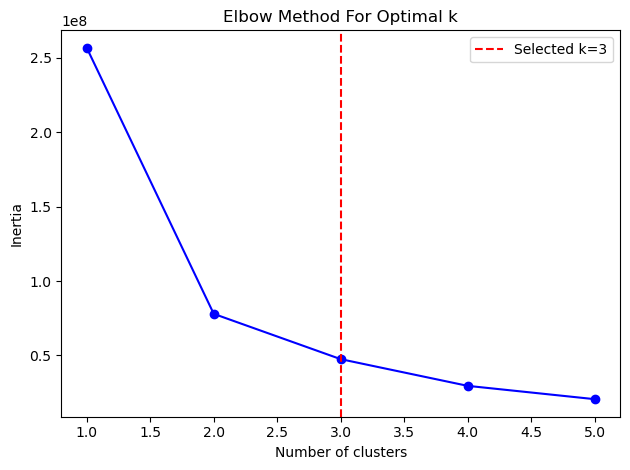

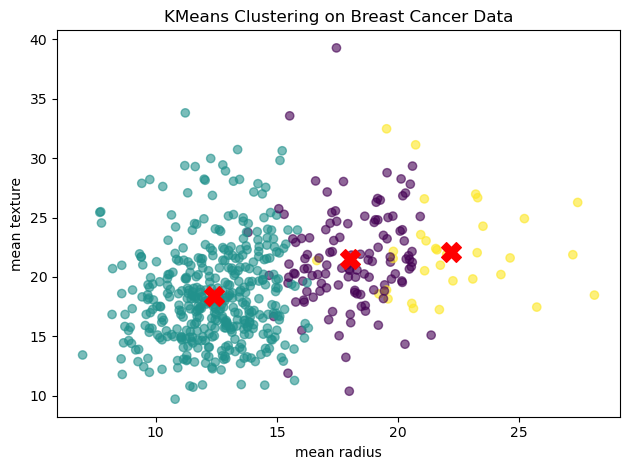

Silhouette Score for k=3: 0.65


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def main():
    bc = load_breast_cancer()
    X = bc.data

    inertia_values = []
    for i in range(1, 6):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    inertia_diffs = []
    for i in range(len(inertia_values)-1):
        diff = inertia_values[i] - inertia_values[i+1]
        inertia_diffs.append(diff)

    print("Inertia Differences:")
    for i, d in enumerate(inertia_diffs, start=2):
        print(f"k={i} ➜ k={i+1}  Δ = {d:.2f}")

    plt.plot(range(1, 6), inertia_values, 'bo-')
    plt.axvline(x=3, color='red', linestyle='--', label='Selected k=3')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.legend()
    plt.tight_layout()
    plt.show()

    k = 3
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
    plt.xlabel(bc.feature_names[0])
    plt.ylabel(bc.feature_names[1])
    plt.title('KMeans Clustering on Breast Cancer Data')
    plt.tight_layout()
    plt.show()

    score = silhouette_score(X, labels)
    print(f'Silhouette Score for k={k}: {score:.2f}')

if __name__ == '__main__':
    main()

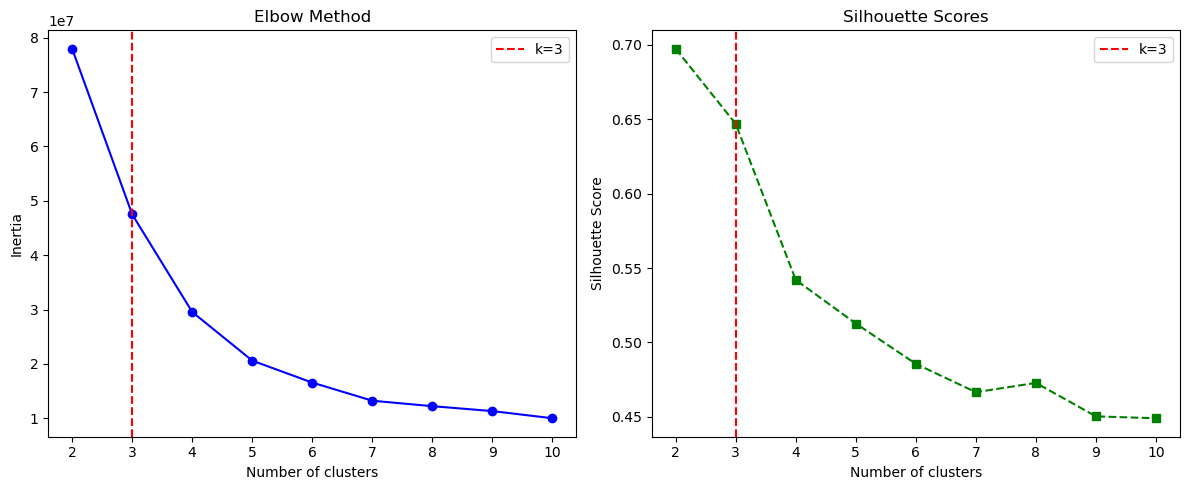

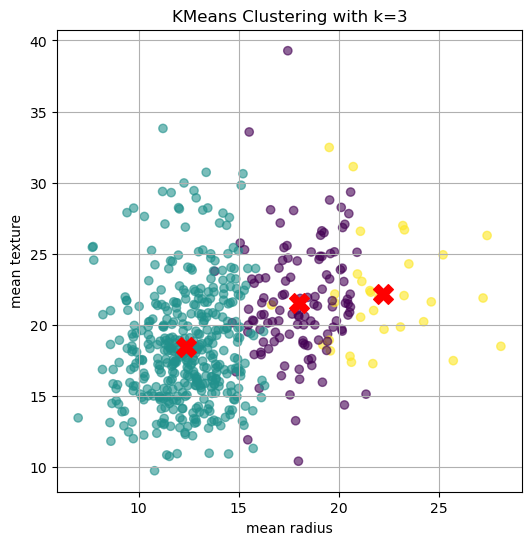

Silhouette Score for k=3: 0.65


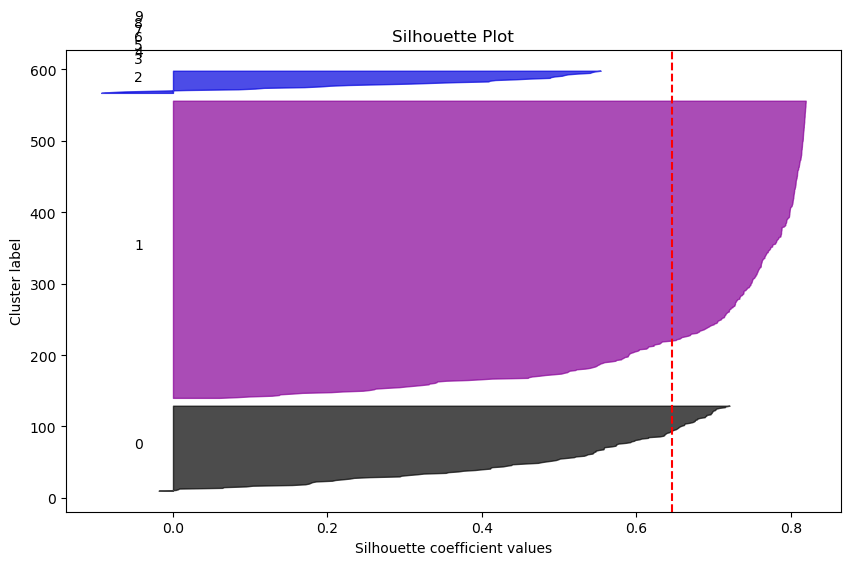

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

bc = load_breast_cancer()
X = bc.data

inertia_values = []
silhouette_scores = []

k_range = range(2, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    inertia_values.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

k_selected = 3

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, 'o-', color='blue')
plt.axvline(x=k_selected, color='red', linestyle='--', label='k=3')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 's--', color='green')
plt.axvline(x=k_selected, color='red', linestyle='--', label='k=3')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.legend()

plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=k_selected, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
plt.xlabel(bc.feature_names[0])
plt.ylabel(bc.feature_names[1])
plt.title(f'KMeans Clustering with k={k_selected}')
plt.grid(True)
plt.show()

score = silhouette_score(X, labels)
print(f'Silhouette Score for k={k_selected}: {score:.2f}')

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

sample_silhouette_values = silhouette_samples(X, labels)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # space between clusters

plt.axvline(x=score, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title("Silhouette Plot")
plt.show()